# Importação de bibliotecas e dados

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from adjustText import adjust_text

#from google.colab import output
#output.enable_custom_widget_manager()
#import tabulate
#from IPython.display import HTML, display
#import ipyregulartable as rt

In [4]:
def normal_count(data,y,xlabel,ylabel,title, h = 8, w = 6):
    with plt.style.context('fivethirtyeight'):
        ax = sns.countplot(data=data, y=y, order = data[y].value_counts().index)
        ax.bar_label(ax.containers[0])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.rcParams['figure.figsize'] =  [h, w]
        return plt.show()
def multiverso_count(data,y,xlabel,ylabel,title, h = 8, w = 6):
    plt.rcParams['figure.figsize'] =  [h, w]
    with plt.xkcd():
        ax = sns.countplot(data=data, y=y, order = data[y].value_counts().index)
        ax.bar_label(ax.containers[0])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        fig = plt.show()

## Apresentação e importação dos dados

In [5]:
campeonatos = pd.read_csv('campeonatos_gauchos_tratado.csv', sep=',', 
                            dtype=({'Edicao': np.uint8, 'Ano' : np.uint16, 'Artilheiro' : object, 
                            'Primeiro' : 'category' , 'Segundo' : 'category', 'Terceiro' : 'category', 
                            'Quarto' : 'category', 'Cidade_Primeiro' : 'category' , 
                            'Cidade_Segundo' : 'category', 'Cidade_Terceiro' : 'category', 
                            'Cidade_Quarto' : 'category', 'N_de_gols' : 'Int8'}))
times = pd.read_csv('times_gauchos_tratado.csv', sep=',', 
                    dtype = ({'Apelido': 'category', 'Nome' : 'category', 'Cidade': 'category'}))
cidades = pd.read_csv('cidades_gauchas_tratado.csv', dtype=({'Cidade' : 'category', 'Microrregioes' : 'category',
                                                                'Mesorregioes' : 'category'}))

In [6]:
campeonatos.head(5)

,Edicao,Ano,Primeiro,Segundo,Terceiro,Quarto,Artilheiro,N_de_gols,Cidade_Primeiro,Cidade_Segundo,Cidade_Terceiro,Cidade_Quarto
0,1,1919,Brasil de Pelotas,Grêmio,NaN,NaN,ProençaBrasil de Pelotas,3,Pelotas,Porto Alegre,NaN,NaN
1,2,1920,Guarany de Bagé,Grêmio,Uruguaiana,NaN,GreccoGuarany de Bagé,2,Bagé,Porto Alegre,Uruguaiana,NaN
2,3,1921,Grêmio,Riograndense-SM,Brasil de Pelotas,Uruguaiana,MosquitoRiograndense,3,Porto Alegre,Santa Maria,Pelotas,Uruguaiana
3,4,1922,Grêmio,Guarani de Alegrete,Guarany de Cruz Alta,Bagé,LagartoGrêmio,5,Porto Alegre,Alegrete,Cruz Alta,Bagé
4,5,1925,Bagé,Grêmio,Guarany de Cruz Alta,Grêmio Santanense,PascoalitoBagé,<NA>,Bagé,Porto Alegre,Cruz Alta,Santana do Livramento


In [7]:
times.tail(5)

,Apelido,Nome,Cidade,Fundacao
104,Uruguaiana,Esporte Clube Uruguaiana,Uruguaiana,19/05/1912
105,Veranópolis,Veranópolis Esporte Clube Recreativo e Cultural,Veranópolis,15/01/1992
106,Veronese,Grêmio Esportivo Veronese,Canoas,01/05/1942
107,Veterano,Veterano Futebol Clube,Carazinho,25/10/1933
108,Ypiranga,Ypiranga Futebol Clube,Erechim,18/08/1924


In [8]:
cidades.head(5)

,Cidade,Populacao_2010,Populacao_2021,Microrregioes,Mesorregioes,PIB_2010,PIB_2019,PIB_per_capita_2010,PIB_per_capita_2019,IDH_1991,IDH_2000,IDH_2010
0,Porto Alegre,1450555.0,1492530,Porto Alegre,Metropolitana,42724992.0,82431477.59,30302.72,55555.39,0.660,0.744,0.805
1,Caxias do Sul,437889.0,523716,Caxias do Sul,Nordeste,16471201.0,27013569.55,37822.92,52873.85,0.594,0.705,0.782
2,Canoas,323827.0,349728,Porto Alegre,Metropolitana,12718014.0,20630280.14,39250.10,59519.12,0.556,0.665,0.750
3,Pelotas,328275.0,343826,Pelotas,Sudeste,4227940.0,9445912.82,12898.79,27586.96,0.558,0.660,0.739
4,Gravataí,255660.0,285564,Porto Alegre,Metropolitana,7295813.0,12396458.37,28525.79,44034.18,0.540,0.661,0.736


## Tipos das variáveis

In [9]:
campeonatos.dtypes.to_frame().reset_index(level=0).rename(columns={'index' : 'Variáveis', 0 : 'Tipos'})

,Variáveis,Tipos
0,Edicao,uint8
1,Ano,uint16
2,Primeiro,category
3,Segundo,category
4,Terceiro,category
5,Quarto,category
6,Artilheiro,object
7,N_de_gols,Int8
8,Cidade_Primeiro,category
9,Cidade_Segundo,category


In [10]:
times['Fundacao'] = pd.to_datetime(times['Fundacao'], infer_datetime_format= False, dayfirst=True, format = '%d/%m/%Y', errors = 'coerce')

In [11]:
times.dtypes.to_frame().reset_index(level=0).rename(columns={'index' : 'Variáveis', 0 : 'Tipos'})

,Variáveis,Tipos
0,Apelido,category
1,Nome,category
2,Cidade,category
3,Fundacao,datetime64[ns]


In [12]:
cidades.dtypes.to_frame().reset_index(level=0).rename(columns={'index' : 'Variáveis', 0 : 'Tipos'})

,Variáveis,Tipos
0,Cidade,category
1,Populacao_2010,float64
2,Populacao_2021,int64
3,Microrregioes,category
4,Mesorregioes,category
5,PIB_2010,float64
6,PIB_2019,float64
7,PIB_per_capita_2010,float64
8,PIB_per_capita_2019,float64
9,IDH_1991,float64


## Contagem dos NA's

In [13]:
campeonatos.isnull().sum().to_frame().reset_index(level=0).rename(columns={'index' : 'Variáveis', 0 : 'Tipos'})

,Variáveis,Tipos
0,Edicao,0
1,Ano,0
2,Primeiro,0
3,Segundo,0
4,Terceiro,1
5,Quarto,5
6,Artilheiro,0
7,N_de_gols,25
8,Cidade_Primeiro,0
9,Cidade_Segundo,0


In [14]:
times.isnull().sum().to_frame().reset_index(level=0).rename(columns={'index' : 'Variáveis', 0 : 'Tipos'})

,Variáveis,Tipos
0,Apelido,0
1,Nome,0
2,Cidade,0
3,Fundacao,3


In [15]:
cidades.isnull().sum().to_frame().reset_index(level=0).rename(columns={'index' : 'Variáveis', 0 : 'Tipos'})

,Variáveis,Tipos
0,Cidade,0
1,Populacao_2010,1
2,Populacao_2021,0
3,Microrregioes,0
4,Mesorregioes,0
5,PIB_2010,4
6,PIB_2019,3
7,PIB_per_capita_2010,4
8,PIB_per_capita_2019,3
9,IDH_1991,4


In [16]:
cidades[pd.isnull(cidades['PIB_2010'])]

,Cidade,Populacao_2010,Populacao_2021,Microrregioes,Mesorregioes,PIB_2010,PIB_2019,PIB_per_capita_2010,PIB_per_capita_2019,IDH_1991,IDH_2000,IDH_2010
26,Santana do Livramento,82513.0,75647,Campanha Central,Sudoeste,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Restinga Seca,15850.0,15702,Restinga Seca,Centro Ocidental,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,Passa-Sete,5159.0,5790,Santa Cruz do Sul,Centro Oriental,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,Pinto Bandeira,NaN,3068,Caxias do Sul,Nordeste,NaN,57446.57,NaN,19129.73,NaN,NaN,NaN


# Análise dos dados

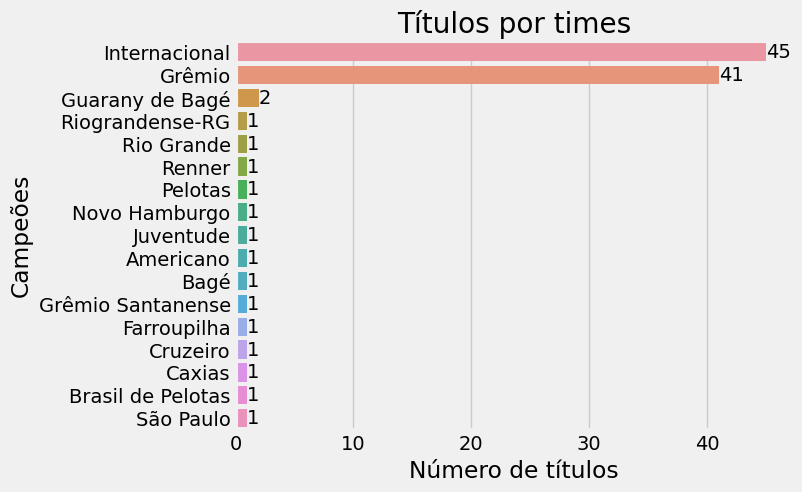

In [30]:
normal_count(campeonatos, 'Primeiro', 'Número de títulos', 'Campeões', 'Títulos por times')

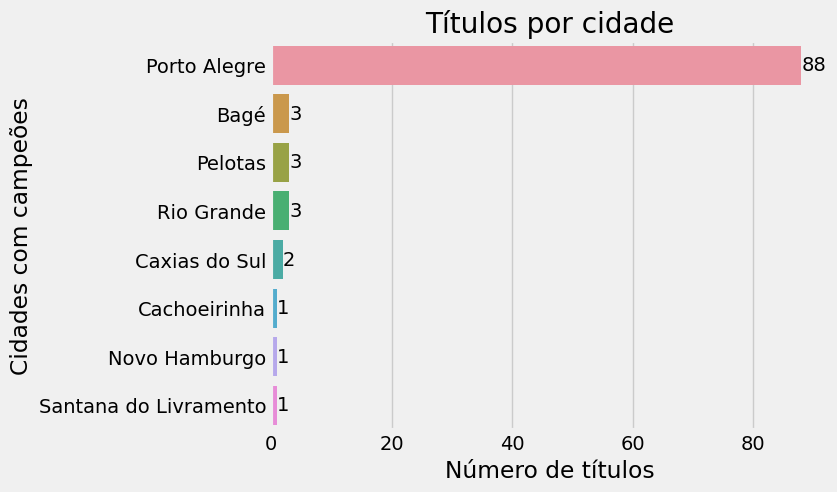

In [18]:
normal_count(campeonatos, 'Cidade_Primeiro', 'Número de títulos', 'Cidades com campeões', 'Títulos por cidade')

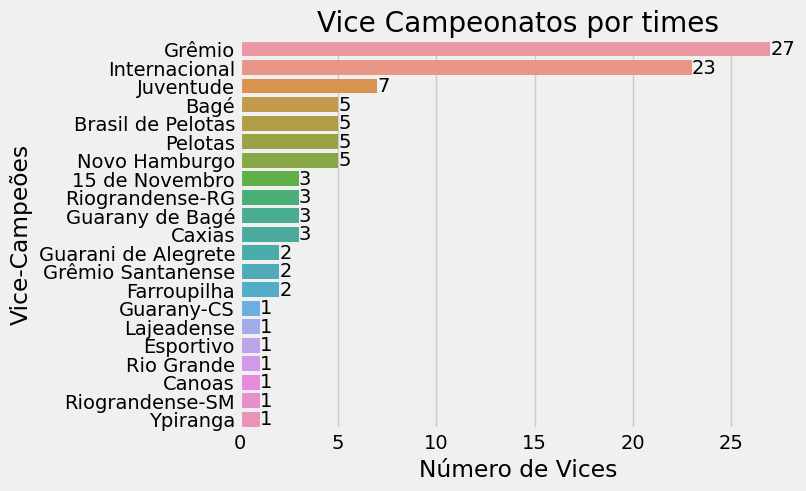

In [19]:
normal_count(campeonatos, 'Segundo', 'Número de Vices', 'Vice-Campeões', 'Vice Campeonatos por times')

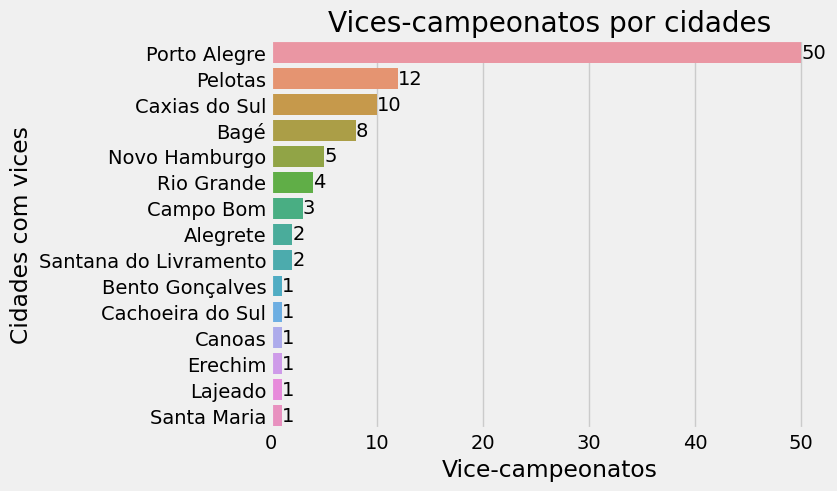

In [20]:
normal_count(campeonatos, 'Cidade_Segundo', 'Vice-campeonatos', 'Cidades com vices', 'Vices-campeonatos por cidades')

In [21]:
titulos_cidade = campeonatos.groupby(['Cidade_Primeiro']).size().to_frame().reset_index(level=0).rename(columns={0: 'Quantidade', 'Cidade_Primeiro' : 'Cidades'})

In [22]:
vice_cidade = campeonatos.groupby(['Cidade_Segundo']).size().to_frame().reset_index(level=0).rename(columns={0: 'Quantidade', 'Cidade_Segundo' : 'Cidades'})

In [23]:
city_counter = Counter(campeonatos['Cidade_Primeiro'])
city_counter.update(campeonatos['Cidade_Segundo']) 
city_counter.update(campeonatos['Cidade_Terceiro'])
city_counter.update(campeonatos['Cidade_Quarto'])
del city_counter[np.nan] 
top4_cidade = pd.DataFrame.from_dict(dict(city_counter), orient='index').reset_index(level=0).\
    rename(columns={'index' : 'Cidades', 0 : 'n_top_4'}).sort_values(by=['n_top_4'], ascending=False, ignore_index = True)
top4_cidade

,Cidades,n_top_4
0,Porto Alegre,158
1,Caxias do Sul,51
2,Pelotas,39
3,Novo Hamburgo,24
4,Bagé,18
5,Santa Maria,13
6,Rio Grande,10
7,Uruguaiana,10
8,Passo Fundo,9
9,Bento Gonçalves,9


In [24]:
cidades =  cidades.merge(top4_cidade, how='left', left_on='Cidade', right_on = "Cidades").drop(columns=['Cidades']).\
    merge(vice_cidade, how='left', left_on='Cidade', right_on = "Cidades").drop(columns=['Cidades']).rename(columns={'Quantidade' : 'Quantidade_Segundo'}).\
    merge(titulos_cidade, how='left', left_on='Cidade', right_on = "Cidades").drop(columns=['Cidades']).rename(columns={'Quantidade' : 'Quantidade_Primeiro'})

In [25]:
cidades['Quantidade_Primeiro'] = cidades['Quantidade_Primeiro'].map({np.nan : 0}).fillna(cidades['Quantidade_Primeiro'])
cidades['Quantidade_Segundo'] = cidades['Quantidade_Segundo'].map({np.nan : 0}).fillna(cidades['Quantidade_Segundo'])
cidades['n_top_4'] = cidades['n_top_4'].map({np.nan : 0}).fillna(cidades['n_top_4'])


In [27]:
def label_point(h,x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    text = []   
    for i, point in a.iterrows():
        if point['val'] in h:
            text.append(plt.text(point['x']-3.5, point['y'], str(point['val'])))
    adjust_text(text,avoid_points = True)
    plt.show()

In [ ]:
ax = sns.scatterplot(data=cidades[cidades['n_top_4'] > 0], x="n_top_4", y="IDH_2010", size="Quantidade_Primeiro", legend=False, sizes=(20, 1000))


In [56]:
def graphics_point(data, x, y, size, text_label, high=[], h = 12, w =8):
    plt.subplots(figsize=(h, w))
    if high == []:
        high = text_label
    ax = sns.scatterplot(data=data[data[x] > 0], x=x, y=y, size=size, legend=False, sizes=(100, 1000))
    text = []   
    for i, point in data.iterrows():
        if point[text_label] in high:
            text.append(plt.text(point[x], point[y], str(point[text_label])))
    adjust_text(text,avoid_points = True)
    plt.show()

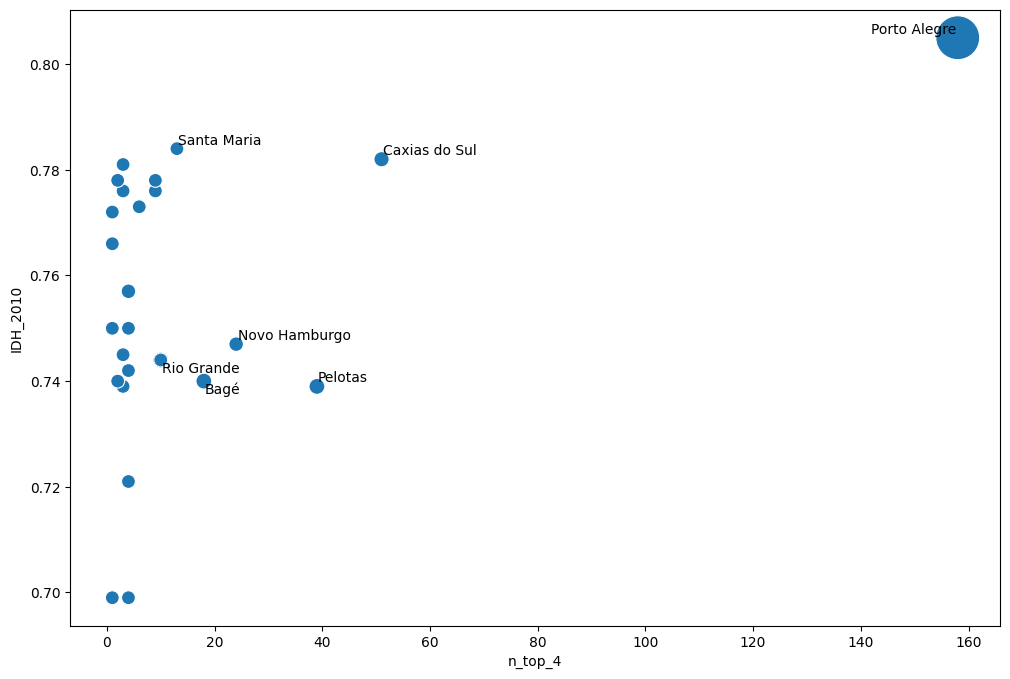

In [57]:
graphics_point(cidades, 'n_top_4', 'IDH_2010', 'Quantidade_Primeiro', 'Cidade',
                ['Porto Alegre', 'Pelotas', 'Caxias do Sul', 'Bagé', 'Rio Grande', 'Santa Maria', 'Novo Hamburgo'] )

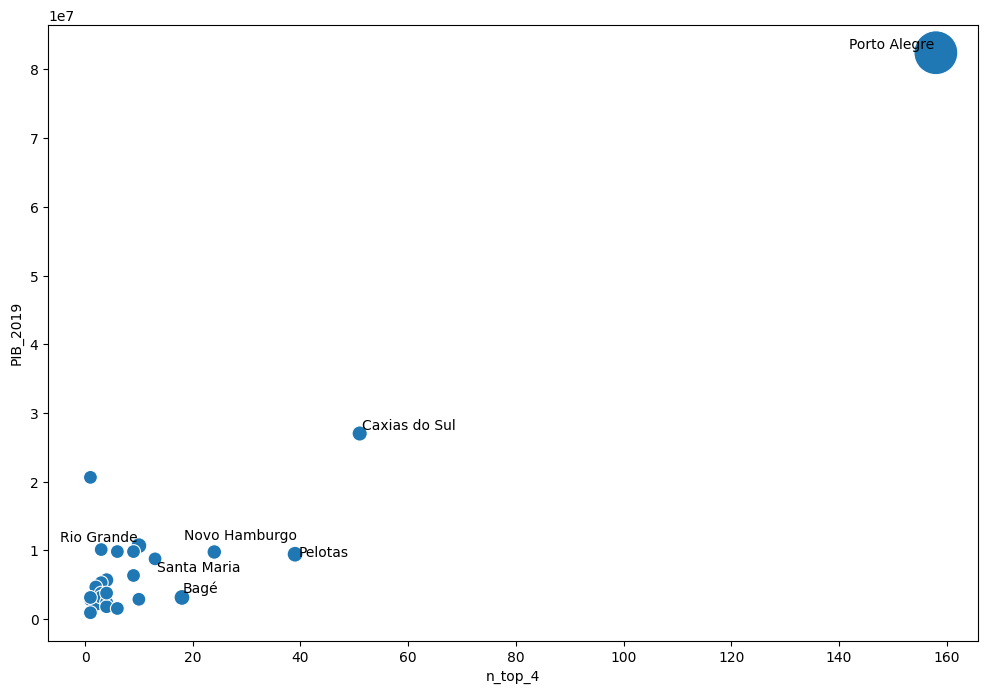

In [60]:
graphics_point(cidades, 'n_top_4', 'PIB_2019', 'Quantidade_Primeiro', 'Cidade',
                ['Porto Alegre', 'Pelotas', 'Caxias do Sul', 'Bagé', 'Rio Grande', 'Santa Maria', 'Novo Hamburgo'] )

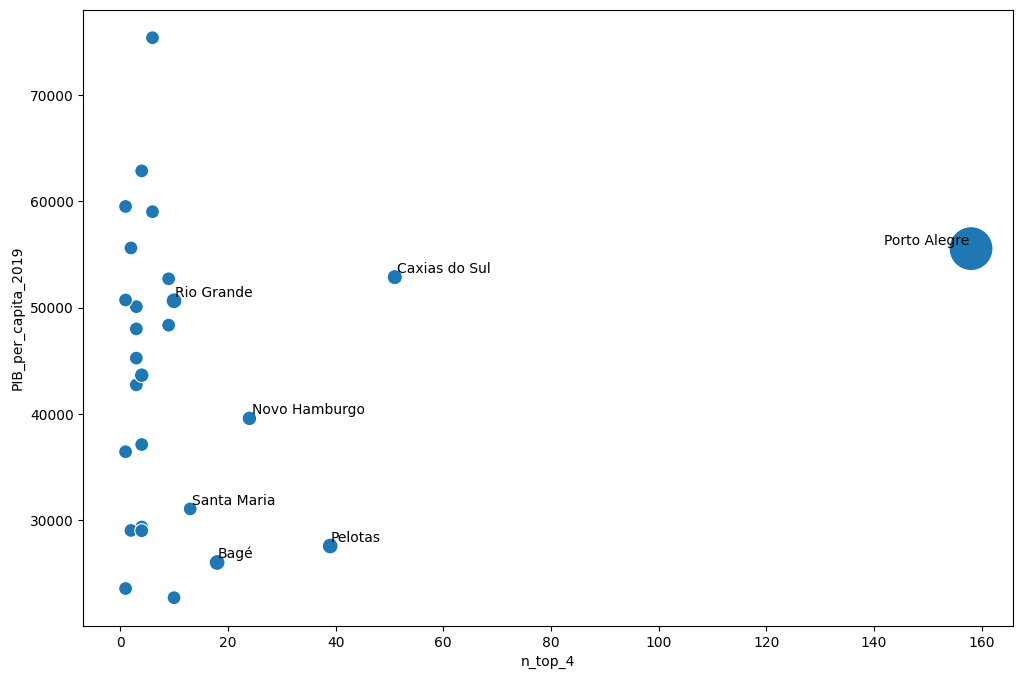

In [61]:
graphics_point(cidades, 'n_top_4', 'PIB_per_capita_2019', 'Quantidade_Primeiro', 'Cidade',
                ['Porto Alegre', 'Pelotas', 'Caxias do Sul', 'Bagé', 'Rio Grande', 'Santa Maria', 'Novo Hamburgo'] )

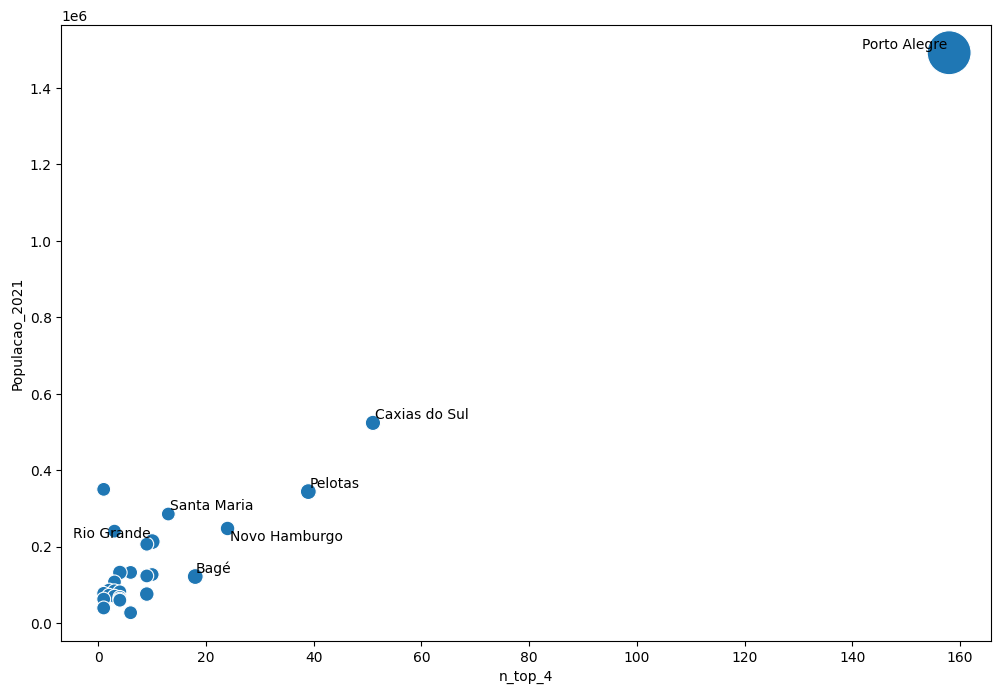

In [63]:
graphics_point(cidades, 'n_top_4', 'Populacao_2021', 'Quantidade_Primeiro', 'Cidade',
                ['Porto Alegre', 'Pelotas', 'Caxias do Sul', 'Bagé', 'Rio Grande', 'Santa Maria', 'Novo Hamburgo'] )

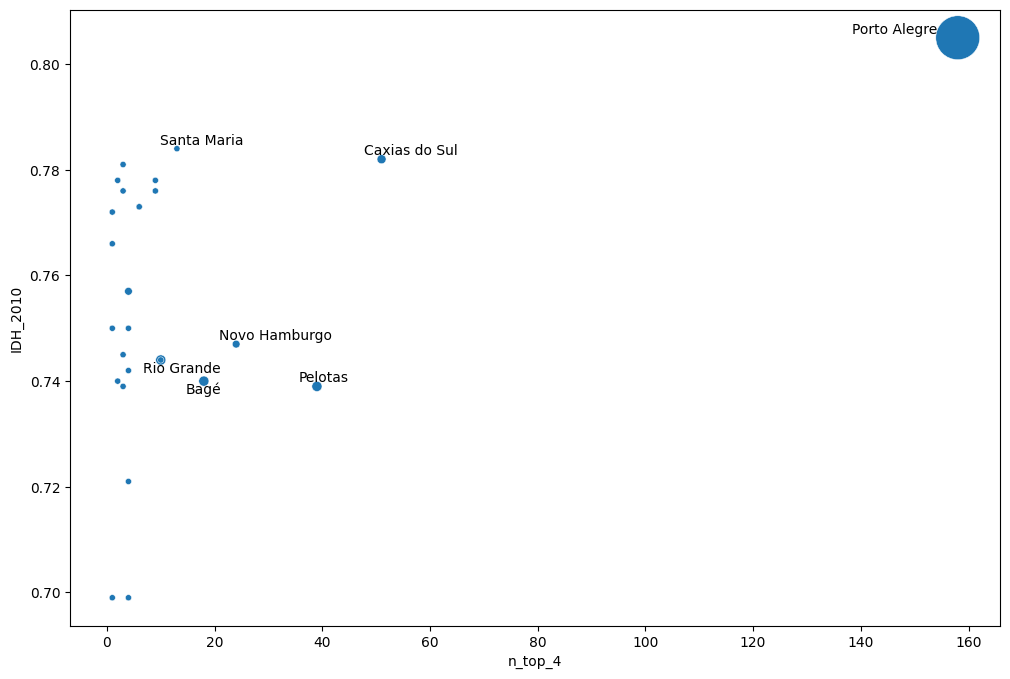

In [28]:
plt.subplots(figsize=(12, 8))
ax = sns.scatterplot(data=cidades[cidades['n_top_4'] > 0], x="n_top_4", y="IDH_2010", size="Quantidade_Primeiro", legend=False, sizes=(20, 1000))
label_point(['Porto Alegre', 'Pelotas', 'Caxias do Sul', 'Bagé', 'Rio Grande', 'Santa Maria', 'Novo Hamburgo'],
            cidades['n_top_4'], cidades['IDH_2010'], cidades['Cidade'], plt.gca())


In [ ]:
lista_nomes = list(map(lambda x: x.split('-') ,times['Nome'].str.split().sum()))

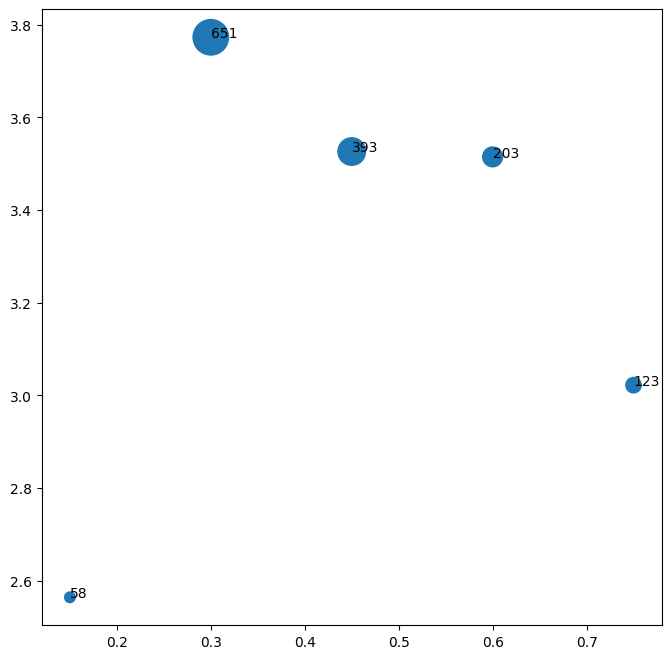

In [ ]:
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
n = [58, 651, 393, 203, 123]

fig, ax = plt.subplots()
ax.scatter(z, y, s = n)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [ ]:
lista_nomes_juntos = []
for palavra in lista_nomes:
    for item in palavra:
        lista_nomes_juntos.append(item)

In [ ]:
#pd.set_option('display.max_columns', 135)
nome_time = Counter(lista_nomes_juntos)
nome_time = pd.DataFrame.from_dict(dict(nome_time), orient='index').reset_index(level=0).\
                rename(columns={'index' : 'Palavras', 0 : 'Contador'}).\
                sort_values(by=['Contador'], ascending=False, ignore_index = True)
nome_time['Palavras'] = nome_time['Palavras'].map({'Club' : 'Clube', 'Football' : 'Futebol', 
                            'Sport' : 'Esporte', 'Foot' : 'Futebol', 'Esportes' : 'Esporte',
                            'Guarany' : 'Guarani', 'Esportiva' : 'Esportivo'}).\
                            fillna(nome_time['Palavras']).\
                            map(lambda x: None if x == 'e' or x == 'de' else x)
nome_time.groupby(['Palavras']).sum(['Contador']).\
    sort_values(by=['Contador'], ascending=False).head(10)

,Contador
Palavras,
Clube,75
Esporte,37
Futebol,31
Esportivo,27
Grêmio,21
Atlético,10
Guarani,9
São,8
Sociedade,7


# Multiverso

## Criando o multiverso

In [ ]:
multiverso_campeonatos = campeonatos.iloc[:, 0:6]

In [ ]:
multiverso_campeonatos['Primeiro'] = multiverso_campeonatos['Primeiro'].map({'Internacional' : 'extinto','Grêmio' : 'extinto'}).fillna(multiverso_campeonatos['Primeiro'])
multiverso_campeonatos['Segundo'] = multiverso_campeonatos['Segundo'].map({'Internacional' : 'extinto', 'Grêmio' : 'extinto'}).fillna(multiverso_campeonatos['Segundo'])
multiverso_campeonatos['Terceiro'] = multiverso_campeonatos['Terceiro'].map({'Internacional' : 'extinto', 'Grêmio' : 'extinto'}).fillna(multiverso_campeonatos['Terceiro'])
multiverso_campeonatos['Quarto'] = multiverso_campeonatos['Quarto'].map({'Internacional' : 'extinto', 'Grêmio' : 'extinto'}).fillna(multiverso_campeonatos['Quarto'])

In [ ]:
#%timeit
#start = time.time()
for index,rows in multiverso_campeonatos.iterrows():
  #for i in rows: 
  if(multiverso_campeonatos.iloc[index,2] == 'extinto'):
    multiverso_campeonatos.iloc[index,2] = multiverso_campeonatos.iloc[index,3]
    multiverso_campeonatos.iloc[index,3] = multiverso_campeonatos.iloc[index,4]
    multiverso_campeonatos.iloc[index,4] = multiverso_campeonatos.iloc[index,5]
    multiverso_campeonatos.iloc[index,5] = None
    if(multiverso_campeonatos.iloc[index,2] == 'extinto'):
      multiverso_campeonatos.iloc[index,2] = multiverso_campeonatos.iloc[index,3]
      multiverso_campeonatos.iloc[index,3] = multiverso_campeonatos.iloc[index,4]
      multiverso_campeonatos.iloc[index,4] = multiverso_campeonatos.iloc[index,5]
      multiverso_campeonatos.iloc[index,5] = None
  if(multiverso_campeonatos.iloc[index,3] == 'extinto'):
    multiverso_campeonatos.iloc[index,3] = multiverso_campeonatos.iloc[index,4]
    multiverso_campeonatos.iloc[index,4] = multiverso_campeonatos.iloc[index,5]
    multiverso_campeonatos.iloc[index,5] = None
    if(multiverso_campeonatos.iloc[index,3] == 'extinto'):
      multiverso_campeonatos.iloc[index,3] = multiverso_campeonatos.iloc[index,4]
      multiverso_campeonatos.iloc[index,4] = multiverso_campeonatos.iloc[index,5]
      multiverso_campeonatos.iloc[index,5] = None
  if(multiverso_campeonatos.iloc[index,4] == 'extinto'):
    multiverso_campeonatos.iloc[index,4] = multiverso_campeonatos.iloc[index,5]
    multiverso_campeonatos.iloc[index,5] = None
    if(multiverso_campeonatos.iloc[index,4] == 'extinto'):
      multiverso_campeonatos.iloc[index,4] = multiverso_campeonatos.iloc[index,5]
      multiverso_campeonatos.iloc[index,5] = None
  if(multiverso_campeonatos.iloc[index,5] == 'extinto'):
    multiverso_campeonatos.iloc[index,5] = None
#end = time.time()

#print("The time of execution of above program is :", end-start)

In [ ]:
multiverso_campeonatos = multiverso_campeonatos.\
    merge(times, how='left', left_on='Primeiro', right_on = "Apelido").drop(columns=['Apelido', 'Nome', 'Fundacao']).rename(columns={"Cidade": "Cidade_Primeiro"}) .\
    merge(times, how='left', left_on='Segundo', right_on = "Apelido").drop(columns=['Apelido', 'Nome', 'Fundacao']).rename(columns={"Cidade": "Cidade_Segundo"}) .\
    merge(times, how='left', left_on='Terceiro', right_on = "Apelido").drop(columns=['Apelido', 'Nome', 'Fundacao']).rename(columns={"Cidade": "Cidade_Terceiro"}) .\
    merge(times, how='left', left_on='Quarto', right_on = "Apelido").drop(columns=['Apelido', 'Nome', 'Fundacao']).rename(columns={"Cidade": "Cidade_Quarto"})

In [ ]:
multiverso_campeonatos.tail(5)

,Edicao,Ano,Primeiro,Segundo,Terceiro,Quarto,Cidade_Primeiro,Cidade_Segundo,Cidade_Terceiro,Cidade_Quarto
98,98,2018,Brasil de Pelotas,São José,Avenida,None,Pelotas,Porto Alegre,Santa Cruz do Sul,NaN
99,99,2019,Caxias,São Luiz,None,None,Caxias do Sul,Ijuí,NaN,NaN
100,100,2020,Caxias,Esportivo,None,None,Caxias do Sul,Bento Gonçalves,NaN,NaN
101,101,2021,Juventude,Caxias,None,None,Caxias do Sul,Caxias do Sul,NaN,NaN
102,102,2022,Ypiranga,Brasil de Pelotas,None,None,Erechim,Pelotas,NaN,NaN


In [ ]:
campeonatos[pd.isnull(campeonatos['Cidade_Quarto'])]

,Edicao,Ano,Primeiro,Segundo,Terceiro,Quarto,Artilheiro,N_de_gols,Cidade_Primeiro,Cidade_Segundo,Cidade_Terceiro,Cidade_Quarto
0,1,1919,Brasil de Pelotas,Grêmio,NaN,NaN,ProençaBrasil de Pelotas,3,Pelotas,Porto Alegre,NaN,NaN
1,2,1920,Guarany de Bagé,Grêmio,Uruguaiana,NaN,GreccoGuarany de Bagé,2,Bagé,Porto Alegre,Uruguaiana,NaN
9,10,1930,Pelotas,Grêmio,Novo Hamburgo,NaN,MarcialPelotas,<NA>,Pelotas,Porto Alegre,Novo Hamburgo,NaN
30,31,1951,Internacional,Pelotas,Rio Grande,NaN,CanhotinhoInternacional,<NA>,Porto Alegre,Pelotas,Rio Grande,NaN
33,34,1954,Renner,Brasil de Pelotas,Ferro Carril,NaN,Breno MelloRenner,3,Porto Alegre,Pelotas,Uruguaiana,NaN


In [ ]:
multiverso_campeonatos.isnull().sum().to_frame().reset_index(level=0).rename(columns={'index' : 'Variáveis', 0 : 'Tipos'})

,Variáveis,Tipos
0,Edicao,0
1,Ano,0
2,Primeiro,0
3,Segundo,1
4,Terceiro,59
5,Quarto,98
6,Cidade_Primeiro,0
7,Cidade_Segundo,1
8,Cidade_Terceiro,59
9,Cidade_Quarto,98


In [ ]:
# start = time.time()
# for index,rows in multiverso_campeonatos.iterrows():
#   rows = rows.to_frame().T
#   for i in rows:
#     row = rows.loc[:,i].values[0]
#     if pd.notnull(row):
#       if row == 'extinto':
#         index_col = rows.columns.get_loc(i)
#         print(index_col,index)
#         if(index_col!= (cols-1)):
#           #multiverso_campeonatos.iloc[index,index_col] = multiverso_campeonatos.iloc[index,(index_col + 1)]
#           #multiverso_campeonatos.iloc[index,(index_col + 1)] = 'extinto'
# end = time.time()
# print("The time of execution of above program is :", end-start)

## Estudando o multiverso

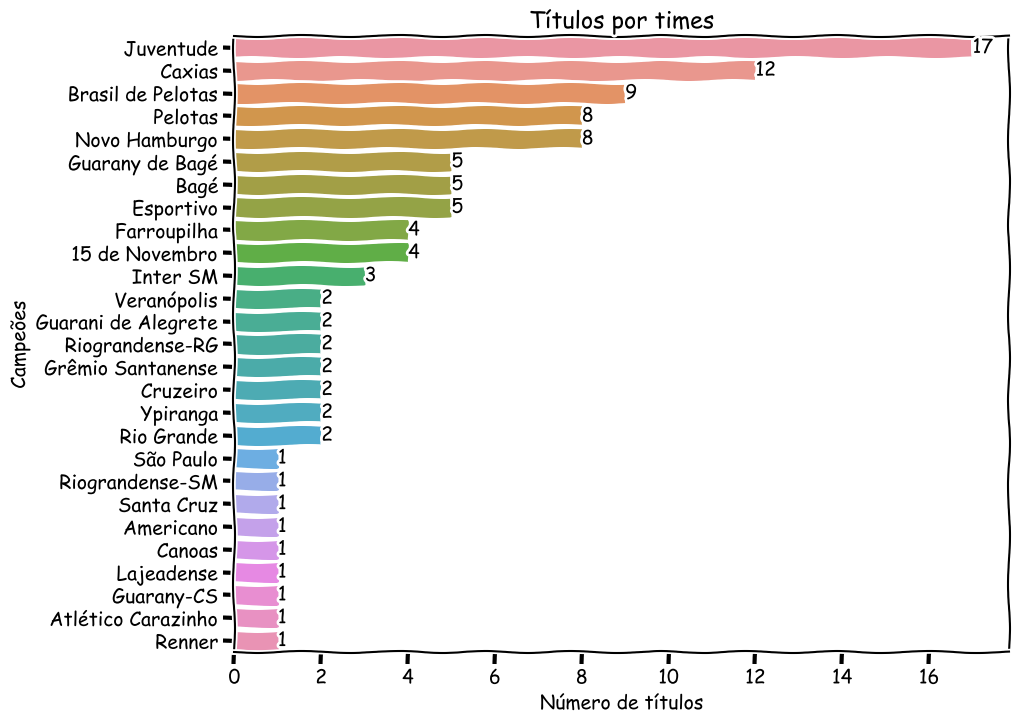

In [ ]:
ax = multiverso_count(multiverso_campeonatos, 'Primeiro', 'Número de títulos', 'Campeões', 'Títulos por times', h = 10, w =8)

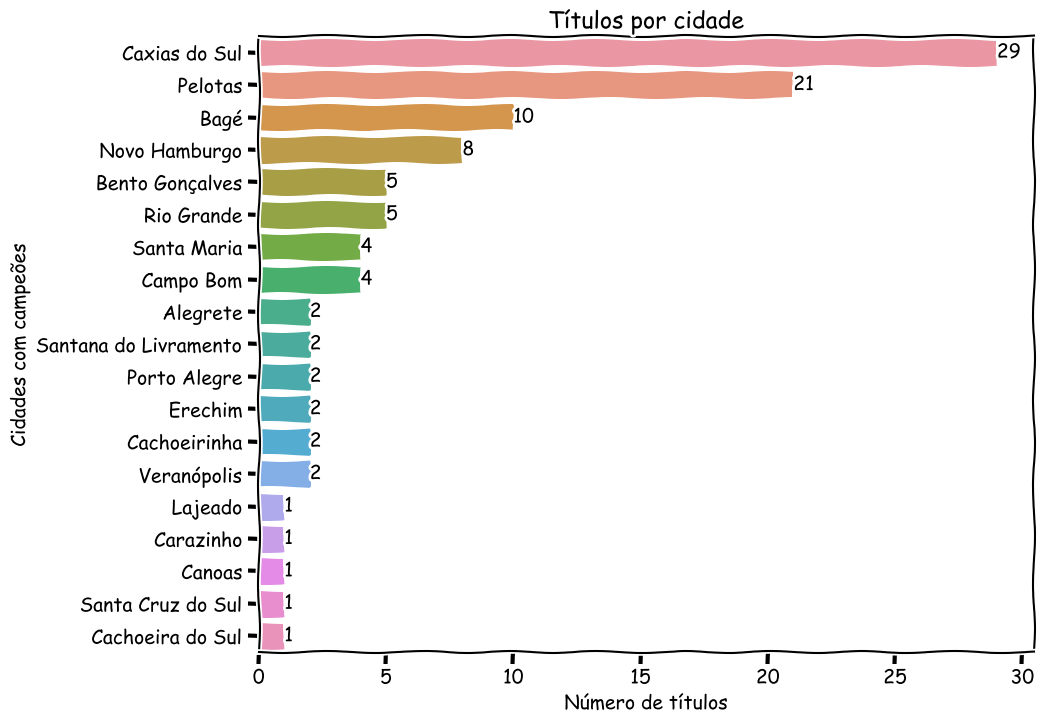

In [ ]:
with plt.xkcd():
    ax = sns.countplot(data=multiverso_campeonatos, y='Cidade_Primeiro', order = multiverso_campeonatos['Cidade_Primeiro'].cat.remove_unused_categories().value_counts().index)
    ax.bar_label(ax.containers[0])
    ax = plt.xlabel('Número de títulos')
    ax = plt.ylabel('Cidades com campeões')
    ax = plt.title('Títulos por cidade')
    plt.show()

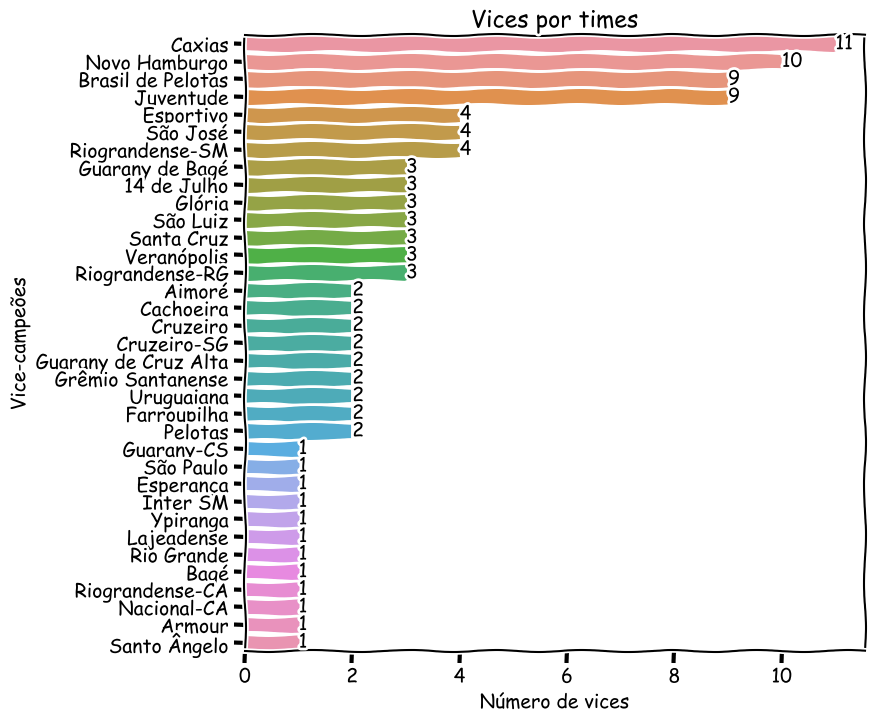

In [ ]:
multiverso_count(multiverso_campeonatos, 'Segundo', 'Número de vices', 'Vice-campeões', 'Vices por times', h = 8, w = 8)


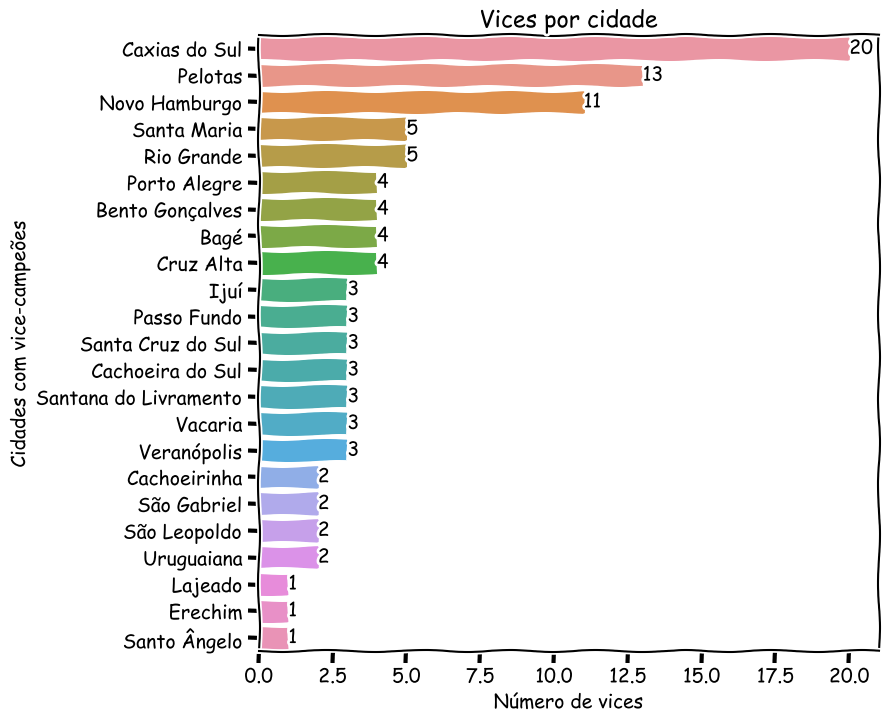

In [ ]:
with plt.xkcd():
    ax = sns.countplot(data=multiverso_campeonatos, y='Cidade_Segundo', order = multiverso_campeonatos['Cidade_Segundo'].cat.remove_unused_categories().value_counts().index)
    ax.bar_label(ax.containers[0])
    ax = plt.xlabel('Número de vices')
    ax = plt.ylabel('Cidades com vice-campeões')
    ax = plt.title('Vices por cidade')
    plt.show()

In [ ]:
times.sort_values(by='Fundacao', ignore_index=True).head(15)

,Apelido,Nome,Cidade,Fundacao
0,Rio Grande,Sport Club Rio Grande,Rio Grande,1900-07-19
1,Grêmio,Grêmio Foot-Ball Porto Alegrense,Porto Alegre,1903-09-15
2,Guarany de Bagé,Guarany Futebol Clube,Bagé,1907-04-19
3,São Paulo,Sport Club São Paulo,Rio Grande,1908-10-04
4,Pelotas,Esporte Clube Pelotas,Pelotas,1908-10-11
5,Guarany de Rosário,Sport Club Guarany,Rosário do Sul,1909-02-03
6,Internacional,Sport Club Internacional,Porto Alegre,1909-04-04
7,Riograndense-RG,Football Club Riograndense,Rio Grande,1909-07-11
8,Lajeadense,Clube Esportivo Lajeadense,Lajeado,1911-04-23
9,Novo Hamburgo,Esporte Clube Novo Hamburgo,Novo Hamburgo,1911-05-01


# Códigos para tabelas interativas

In [ ]:
df = pd.DataFrame({'col1' : ['A','B','C', 'A', 'A'],'col2' : ['A','A','A', 'A', 'A']})

In [ ]:
df.groupby(['col1','col2']).stack()

AttributeError: 'DataFrameGroupBy' object has no attribute 'stack'

In [ ]:
#t1 = rt.RegularTableWidget(campeonatos.isnull().sum())
#t1.width = 500
#t1

In [ ]:
#table = tabulate.tabulate(nulo, tablefmt='html', headers = nulo.columns)
#display(HTML(table))